<a href="https://colab.research.google.com/github/anitha0615/Project_4/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install findspark


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=34c5f618b27d385cb738e59ac9b263455a75724cf5a3572c19eab8f27a8f1189
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CSVReadExample").getOrCreate()

In [ ]:
import findspark
findspark.init()

In [108]:
# Read the CSV file into a DataFrame and limit rows to 250,000
csv_file_path = "/content/card_transdata.csv"
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)
df.limit(250000)


DataFrame[distance_from_home: double, distance_from_last_transaction: double, ratio_to_median_purchase_price: double, repeat_retailer: double, used_chip: double, used_pin_number: double, online_order: double, fraud: double]

# New Section

In [ ]:
# Show the first few rows of the DataFrame
df.show()

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
| 57.87785658389723|            0.3111400080477545|            1.9459399775518593|            1.0|      1.0|            0.0|         0.0|  0.0|
|10.829942699255545|           0.17559150228166587|            1.2942188106198573|            1.0|      0.0|            0.0|         0.0|  0.0|
| 5.091079490616996|            0.8051525945853258|           0.42771456119427587|            1.0|      0.0|            0.0|         1.0|  0.0|
|2.2475643282963613|              5.60004354707232|           0.36266257805709584|            1.0|      1.0|            0.0|         1.0

In [ ]:
dfgr = df.groupby( "fraud").mean()


In [ ]:
from pyspark.sql.functions import col, when
from pyspark.sql.types import StringType,BooleanType,DateType

dfgr.show()

#dfgr_conv = dfgr.withColumn("fraud_boolean", when( col("fraud") == (0.0), True).otherwise(False))

#dfgr_conv.show()

dfgr_pd = dfgr.toPandas()

+-----+-----------------------+-----------------------------------+-----------------------------------+--------------------+-------------------+--------------------+------------------+----------+
|fraud|avg(distance_from_home)|avg(distance_from_last_transaction)|avg(ratio_to_median_purchase_price)|avg(repeat_retailer)|     avg(used_chip)|avg(used_pin_number)| avg(online_order)|avg(fraud)|
+-----+-----------------------+-----------------------------------+-----------------------------------+--------------------+-------------------+--------------------+------------------+----------+
|  0.0|     22.832976018240924|                  4.301390735421416|                 1.4236418554580572|  0.8816717565365654|   0.35940179509685| 0.10994447713503332|0.6222253634408178|       0.0|
|  1.0|      66.26187633436903|                 12.712185129666834|                   6.00632349048699|   0.880118531400524|0.25639852178986994|0.003123462581375...|0.9463176321178907|       1.0|
+-----+-------------

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

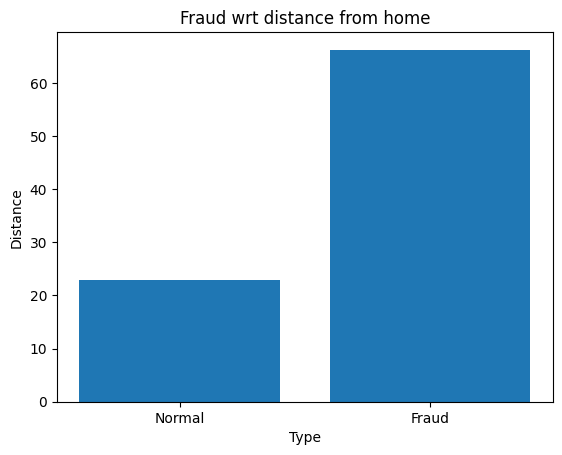

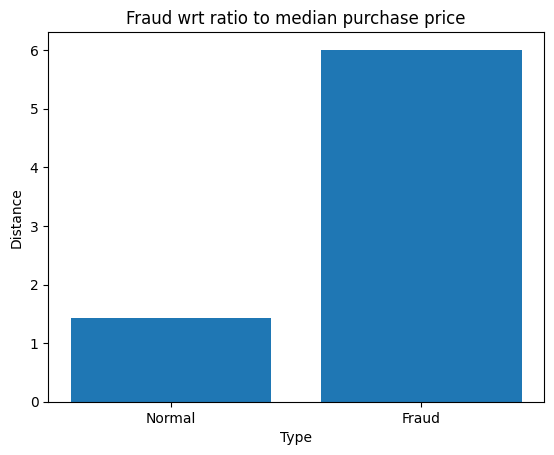

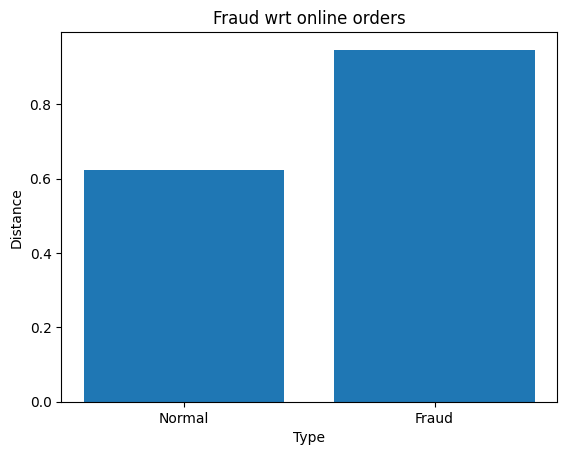

In [ ]:
#for i in dfgr_pd:
#print(i)
plt.title("Fraud wrt distance from home")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(distance_from_home)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()
plt.title("Fraud wrt ratio to median purchase price")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(ratio_to_median_purchase_price)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()

plt.title("Fraud wrt online orders")
plt.bar(["Normal","Fraud"],dfgr_pd["avg(online_order)"])
plt.xlabel("Type")
plt.ylabel("Distance")
plt.show()



In [100]:
original_df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [112]:
#convert the original spark dataframe to a pandas dataframe
original_df = df.limit(250000).toPandas()
# create the labels set (y) from the "fraud" column,a nd then create the features (X) DataFrame from the remaining columns.
# Separate the data into labels and features
# Separate the y variable, the labels

y = original_df['fraud']

# Separate the X variable, the features
X = original_df.drop(columns=['fraud'])


In [113]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [109]:
# Check the balance of our target values
y.value_counts()

0.0    228295
1.0     21705
Name: fraud, dtype: int64

In [114]:
 # Split the data into training and testing datasets by using train_test_split.
 # Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


In [119]:
#Create a Logistic Regression Model with the Original Data
#Fit a logistic regression model by using the training data (X_train and y_train).

# Instantiate the Logistic Regression Model
# Assign a random_state parameter of  to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
training_data_model = logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
